In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

針對 location 細分

In [2]:
df = pd.read_excel('Profile.xlsx')
df = df[['followers_count', 'following_count', 'tweet_count', 'class']]
#df['verified'] *= 1
df_none = df[df['class'] == 0].copy()
df_usa = df[df['class'] == 1].copy()
df_other = df[df['class'] == -1].copy()

In [3]:
# Normalizatoin
# 先不做，因為 verified 會全部變成 0
scalar = MinMaxScaler()
scalar = scalar.fit(df.iloc[:, :])
df.iloc[:, :] = scalar.transform(df.iloc[:, :])


In [4]:
# Visualization
X = df.to_numpy()


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# start kmeans
n = 7
fit = KMeans(n_clusters = n, n_init =1000 , verbose =0).fit(X)

# labels
pred_labels = list(fit.labels_)

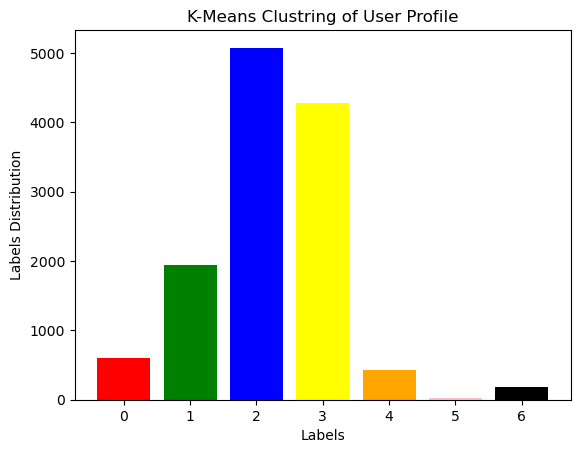

In [7]:
count = dict()
for i in range(n):
    count[str(i)] = 0
for i in pred_labels:
    count[str(i)] += 1

# plot

color=['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'black']
plt.bar(list(count.keys()), list(count.values()), color =color)
plt.xlabel('Labels')
plt.ylabel('Labels Distribution')
plt.title('K-Means Clustring of User Profile')
plt.show()

In [8]:
# None Clustring
n = 3
scalar = scalar.fit(df_none.iloc[:, :])
df_none.iloc[:, :] = scalar.transform(df_none.iloc[:, :])
X = df_none.to_numpy()
fit = KMeans(n_clusters = n, n_init =1000 , verbose =0).fit(X)

# labels
pred_labels = list(fit.labels_)
df_none

,followers_count,following_count,tweet_count,class
0,0.000000,0.001100,0.000041,0.0
2,0.000000,0.001336,0.000907,0.0
3,0.000000,0.004204,0.004153,0.0
5,0.000000,0.001140,0.000291,0.0
6,0.000000,0.000432,0.000002,0.0
...,...,...,...,...
12530,0.157783,0.144600,0.033702,0.0
12543,0.308006,0.001336,0.000797,0.0
12545,0.334966,0.035914,0.045115,0.0
12546,0.390114,0.082025,0.174551,0.0


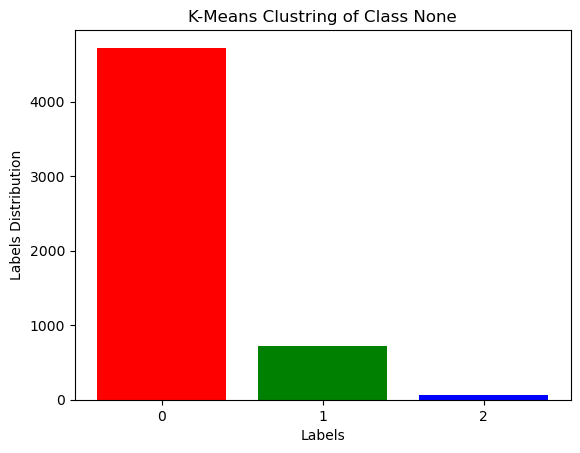

In [9]:
count = dict()
for i in range(n):
    count[str(i)] = 0
for i in pred_labels:
    count[str(i)] += 1

# plot
color=['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'black']
plt.bar(list(count.keys()), list(count.values()), color =color)
plt.xlabel('Labels')
plt.ylabel('Labels Distribution')
plt.title('K-Means Clustring of Class None')
plt.show()

In [10]:
# USA Clustring
n = 2
scalar = scalar.fit(df_usa.iloc[:, :])
df_usa.iloc[:, :] = scalar.transform(df_usa.iloc[:, :])
X = df_usa.to_numpy()
fit = KMeans(n_clusters = n, n_init =1000 , verbose =0).fit(X)

# labels
pred_labels = list(fit.labels_)
df_usa

,followers_count,following_count,tweet_count,class
18,0.000000,0.000193,0.000046,0.0
28,0.000000,0.001157,0.000056,0.0
31,0.000000,0.000000,0.000308,0.0
36,0.000000,0.000000,0.000034,0.0
41,0.000000,0.000154,0.000038,0.0
...,...,...,...,...
12556,0.111439,0.030379,0.058120,0.0
12557,0.127348,0.057822,0.032463,0.0
12558,0.181147,0.016719,0.099118,0.0
12559,0.183108,0.443708,0.145936,0.0


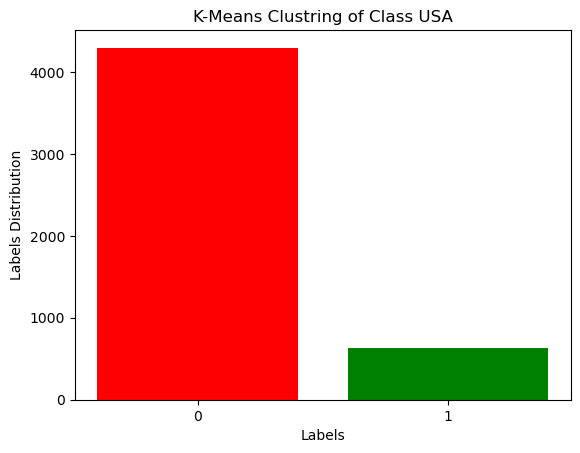

In [11]:
count = dict()
for i in range(n):
    count[str(i)] = 0
for i in pred_labels:
    count[str(i)] += 1

# plot
color=['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'black']
plt.bar(list(count.keys()), list(count.values()), color =color)
plt.xlabel('Labels')
plt.ylabel('Labels Distribution')
plt.title('K-Means Clustring of Class USA')
plt.show()